<a href="https://colab.research.google.com/github/wisnua97/level-up-advanced-python-3213390/blob/main/Linkedin_Learning_Course_LogisticRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [29]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd
import io
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from sklearn import preprocessing
plt.rc("font", size = 14)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
sns.set(style="white")
sns.set(style="whitegrid", color_codes = True)

In [28]:
# Built in colab with local data upload

from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving loan.csv to loan (2).csv
User uploaded file "loan.csv" with length 347 bytes


In [32]:
df = pd.read_csv(io.StringIO(uploaded['loan.csv'].decode('utf-8')))
df = df = df[['Income','Loan Amount','Default']] 
df.head()

,Income,Loan Amount,Default
0,30,8,No
1,22,10,No
2,33,12,No
3,28,20,No
4,23,32,No


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Income       30 non-null     int64 
 1   Loan Amount  30 non-null     int64 
 2   Default      30 non-null     object
dtypes: int64(2), object(1)
memory usage: 848.0+ bytes


In [39]:
df.describe()

,Income,Loan Amount
count,30.000000,30.000000
mean,20.966667,54.233333
std,6.195011,28.231412
min,12.000000,8.000000
25%,16.250000,32.000000
50%,20.500000,54.500000
75%,24.750000,71.750000
max,34.000000,110.000000


In [42]:
!pip install matplotlib-venn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [49]:
from matplotlib import pyplot as plt
import seaborn as sns

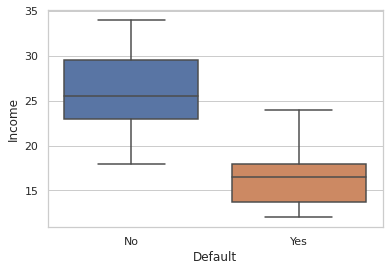

In [52]:
ax = sns.boxplot(data = df, x = 'Default', y = 'Income')

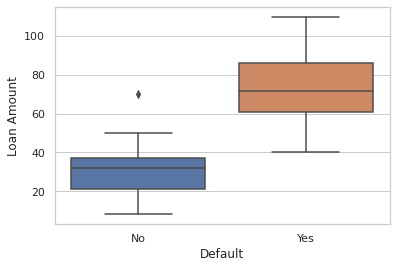

In [54]:
ax = sns.boxplot (data = df, x = 'Default', y = 'Loan Amount')

In [58]:
import numpy as py

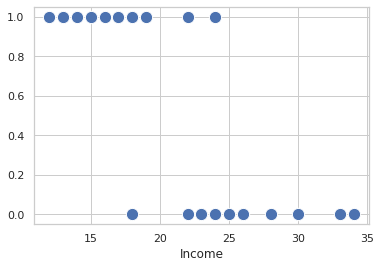

In [60]:
ax = sns.scatterplot(x = df['Income'], y = py.where(df['Default']=='No', 0, 1), s = 150)

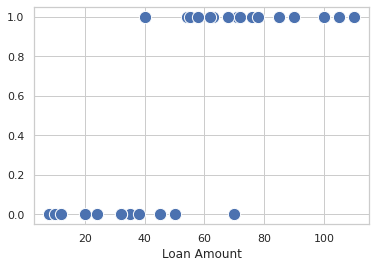

In [64]:
ax = sns.scatterplot(x = df['Loan Amount'], y =py.where(df['Default']=='No', 0, 1), s = 150)

In [66]:
y = df['Default']

In [67]:
x = df[['Income', 'Loan Amount']]

In [68]:
from sklearn.model_selection import train_test_split

In [69]:
X_train, X_test, y_train, y_test = train_test_split(x, y, train_size = 0.7, stratify = y, random_state=123)

In [70]:
X_train.shape

(21, 2)

In [71]:
X_test.shape

(9, 2)

In [72]:
from sklearn.linear_model import LogisticRegression

In [73]:
classifier = LogisticRegression()

In [74]:
model = classifier.fit(X_train, y_train)

In [75]:
model.predict(X_test)

array(['Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'No', 'No', 'No', 'Yes'],
      dtype=object)

In [76]:
model.score(X_test, y_test)

0.8888888888888888

In [77]:
from sklearn.metrics import confusion_matrix

In [78]:
confusion_matrix(y_test, model.predict(X_test))

array([[3, 1],
       [0, 5]])

In [79]:
model.intercept_

array([15.4670632])

In [80]:
model.coef_

array([[-1.0178107 ,  0.14656096]])

In [81]:
log_odds = py.round(model.coef_[0], 2)
log_odds

array([-1.02,  0.15])

In [83]:
!pip install pandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [84]:
import pandas as pd

In [88]:
pd.DataFrame({'log odds': log_odds}, index = x.columns)

,log odds
Income,-1.02
Loan Amount,0.15


In [91]:
odds = py.round(py.exp(log_odds), 2)
pd.DataFrame({'odds':odds}, index =x.columns)

,odds
Income,0.36
Loan Amount,1.16
